In [6]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
tips_df=sns.load_dataset('tips')

In [11]:
print(tips_df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: >

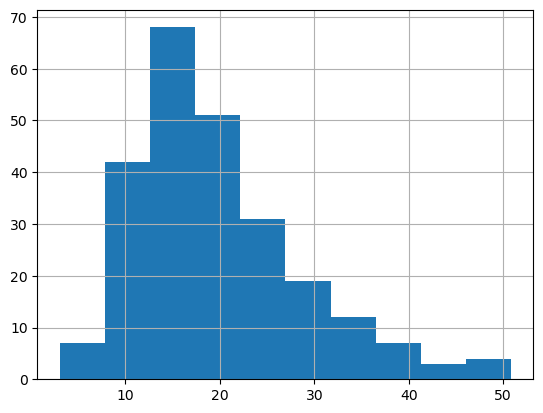

In [4]:
tips_df['total_bill'].hist()

In [7]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [12]:
#creating the column
total_bill_column = tips_df[['total_bill']]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
total_bill_scaled = scaler.fit_transform(total_bill_column)

# Replace
tips_df['total_bill'] = total_bill_scaled

<Axes: >

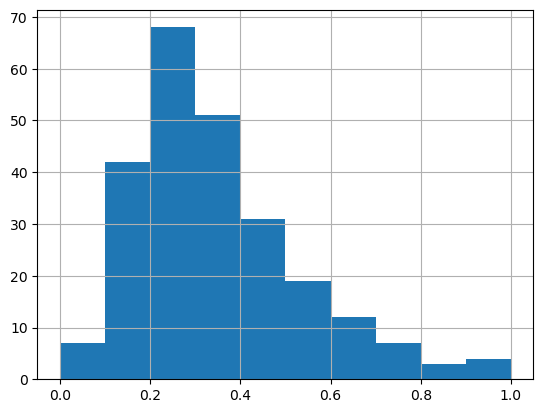

In [14]:
tips_df['total_bill'].hist()

APPLYING POWER TRANSPORTATION

In [ ]:
pt=PowerTransformer()
tips_df.tip.hist()
tips_df['tip_pt']=pt.fit_transform(tips_df[['tip_pt']])

In [21]:
categorical_df=tips_df.select_dtypes(include='category')
numerical_df=tips_df.select_dtypes(include='number')

In [22]:
categorical_df

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [32]:
nominals_df=pd.get_dummies(categorical_df[["sex",'smoker']],dtype=int)

,sex_Male,sex_Female,smoker_Yes,smoker_No
0,0,1,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,0,1,0,1
...,...,...,...,...
239,1,0,0,1
240,0,1,1,0
241,1,0,1,0
242,1,0,0,1


In [34]:
categorical_df[['day','time']]

,day,time
0,Sun,Dinner
1,Sun,Dinner
2,Sun,Dinner
3,Sun,Dinner
4,Sun,Dinner
...,...,...
239,Sat,Dinner
240,Sat,Dinner
241,Sat,Dinner
242,Sat,Dinner


In [37]:
categorical_df['time'].map({"Dinner":1,"Lunch":0})

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    1
241    1
242    1
243    1
Name: time, Length: 244, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder